In [1]:
import sys
import pandas as pd
import gensim
import numpy as np

print( F"Python version : {sys.version}\nPandas version : {pd.__version__}\nGensim version : {gensim.__version__}\nNumpy version : {np.__version__}" )

Python version : 3.10.9 (main, Mar  1 2023, 12:33:47) [Clang 14.0.6 ]
Pandas version : 2.0.3
Gensim version : 4.3.0
Numpy version : 1.25.1


In [2]:
df = pd.read_csv("./Car_and_MSRP.csv")
df.tail(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


# Clean DATA

In [3]:
df["make_model"] = df["Make"]+" "+df["Model"]

# Select columns which has string values

df_clean = df.loc[:,['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style','make_model']]

# Combine all the columns to one column

df_clean = df_clean.apply(lambda x: ','.join( x.astype(str) ), axis=1 )

# convert to dataframe

df_clean = pd.DataFrame({'clean':df_clean})
df_clean.tail(3)

,clean
11911,"premium unleaded (required),AUTOMATIC,all whee..."
11912,"premium unleaded (recommended),AUTOMATIC,all w..."
11913,"regular unleaded,AUTOMATIC,front wheel drive,L..."


In [4]:
sen = [ row.split(',') for row in df_clean.clean ]
sen[:3]

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series']]

# Finding similarity

In [5]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [6]:
model = Word2Vec( sen, min_count=1, vector_size=30, workers=3, window=3, sg=1 )
# size = learning rate, window = number of words before and after, sg = 1 is skip-gram sg = 0 is CBOW (default)

print(model)

Word2Vec<vocab=977, vector_size=30, alpha=0.025>


In [7]:
# model.wv.key_to_index
# The mothod above is to observe a name of cars

In [8]:
# get all vector

model.wv.vectors

array([[-0.03548425,  0.44939744,  0.65431696, ...,  0.36778668,
         0.00743131, -0.26108953],
       [-0.03479578, -0.04558481,  1.0424474 , ..., -0.07307617,
        -0.21247976, -0.47168672],
       [-0.42771065, -0.54428667,  0.04452519, ..., -0.06170546,
        -0.6221971 ,  0.1567907 ],
       ...,
       [-0.00290017,  0.02219624,  0.05296549, ...,  0.03504691,
        -0.04040462, -0.05522791],
       [-0.02592771,  0.02572339,  0.03130447, ...,  0.01234397,
        -0.03270136, -0.02903714],
       [ 0.01517396,  0.02451934,  0.0513647 , ...,  0.02657288,
         0.00579292, -0.01684534]], dtype=float32)

In [9]:
# get specific vector

model.wv["Porsche 718 Cayman"]

array([ 0.0537617 ,  0.08278883,  0.09971438,  0.01091143, -0.02353701,
       -0.03666039,  0.00771024,  0.03512556, -0.05992376, -0.04453665,
        0.09486789, -0.10902161, -0.0253478 , -0.05018361, -0.13782321,
        0.00807972,  0.0401655 ,  0.04433057, -0.1165973 ,  0.04444816,
        0.04618911,  0.05076554,  0.0098184 ,  0.04759173,  0.00666375,
        0.1493983 ,  0.04034045,  0.0362957 , -0.08282552, -0.13914971],
      dtype=float32)

In [10]:
model.wv.most_similar('Porsche 718 Cayman', topn=10)  # get other similar words

[('Aston Martin Vanquish', 0.9612089395523071),
 ('Infiniti G37', 0.961198627948761),
 ('Aston Martin DB9', 0.9611036777496338),
 ('Lincoln Mark VII', 0.9609201550483704),
 ('BMW M6', 0.9596224427223206),
 ('Mercedes-Benz CL-Class', 0.9592157006263733),
 ('Lamborghini Aventador', 0.9588959217071533),
 ('BMW ALPINA B6 Gran Coupe', 0.9575802683830261),
 ('Mercedes-Benz CLK-Class', 0.9575748443603516),
 ('Maybach 57', 0.9569535851478577)]

In [11]:
# Compare
model.wv.similarity('Porsche 718 Cayman', 'Mercedes-Benz SLK-Class')

0.93652034

# PLOT

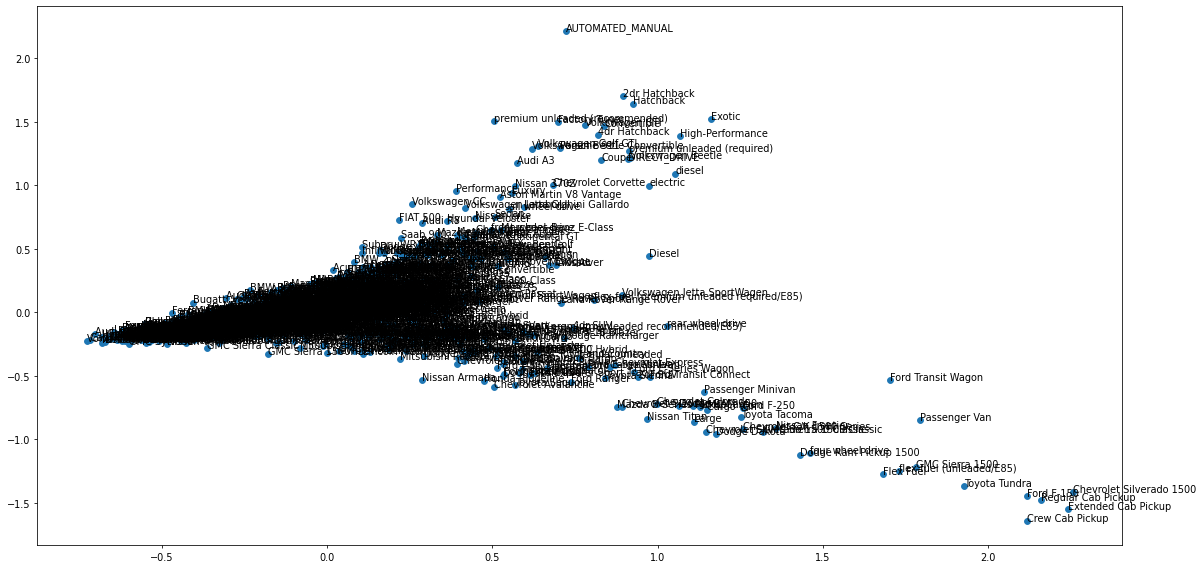

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

sen2 = [ row.split(',') for row in df_clean.clean ]
model2 = Word2Vec( sen2, min_count=1, vector_size=10, workers=3, window=3, sg=1 )

x = model.wv[ list(model.wv.key_to_index) ]
# model2.wv.index_to_key instead of model2.wv.vocab

pca = PCA( n_components=2 )
result = pca.fit_transform(X=x)

plt.figure( figsize=(20,10), dpi = 70 )
plt.scatter( result[:,0],result[:,1] )

# Add annotation
for i,word in enumerate( list(model.wv.key_to_index) ) :
    plt.annotate( word, xy=( result[i,0],result[i,1] ) )